In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime

2023-07-20 18:33:16.558564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tsla = yf.Ticker("TSLA")

hist = tsla.history(period="42mo")

In [22]:
hist

,Open,High,Low,Close
Date,,,,
2020-01-21 00:00:00-05:00,35.349998,36.571999,35.227333,36.480000
2020-01-22 00:00:00-05:00,38.125999,39.633331,37.273335,37.970669
2020-01-23 00:00:00-05:00,37.616669,38.799999,37.040001,38.146667
2020-01-24 00:00:00-05:00,38.042000,38.257332,36.950668,37.654667
2020-01-27 00:00:00-05:00,36.132668,37.629333,35.952000,37.201332
...,...,...,...,...
2023-07-13 00:00:00-04:00,274.589996,279.450012,270.600006,277.899994
2023-07-14 00:00:00-04:00,277.010010,285.299988,276.309998,281.380005
2023-07-17 00:00:00-04:00,286.630005,292.230011,283.570007,290.380005


In [140]:
hist = hist[['Open', 'High', 'Low', 'Close']]
hist

,Open,High,Low,Close
Date,,,,
2020-01-21 00:00:00-05:00,35.349998,36.571999,35.227333,36.480000
2020-01-22 00:00:00-05:00,38.125999,39.633331,37.273335,37.970669
2020-01-23 00:00:00-05:00,37.616669,38.799999,37.040001,38.146667
2020-01-24 00:00:00-05:00,38.042000,38.257332,36.950668,37.654667
2020-01-27 00:00:00-05:00,36.132668,37.629333,35.952000,37.201332
...,...,...,...,...
2023-07-13 00:00:00-04:00,274.589996,279.450012,270.600006,277.899994
2023-07-14 00:00:00-04:00,277.010010,285.299988,276.309998,281.380005
2023-07-17 00:00:00-04:00,286.630005,292.230011,283.570007,290.380005


Text(0, 0.5, 'Stock Price')

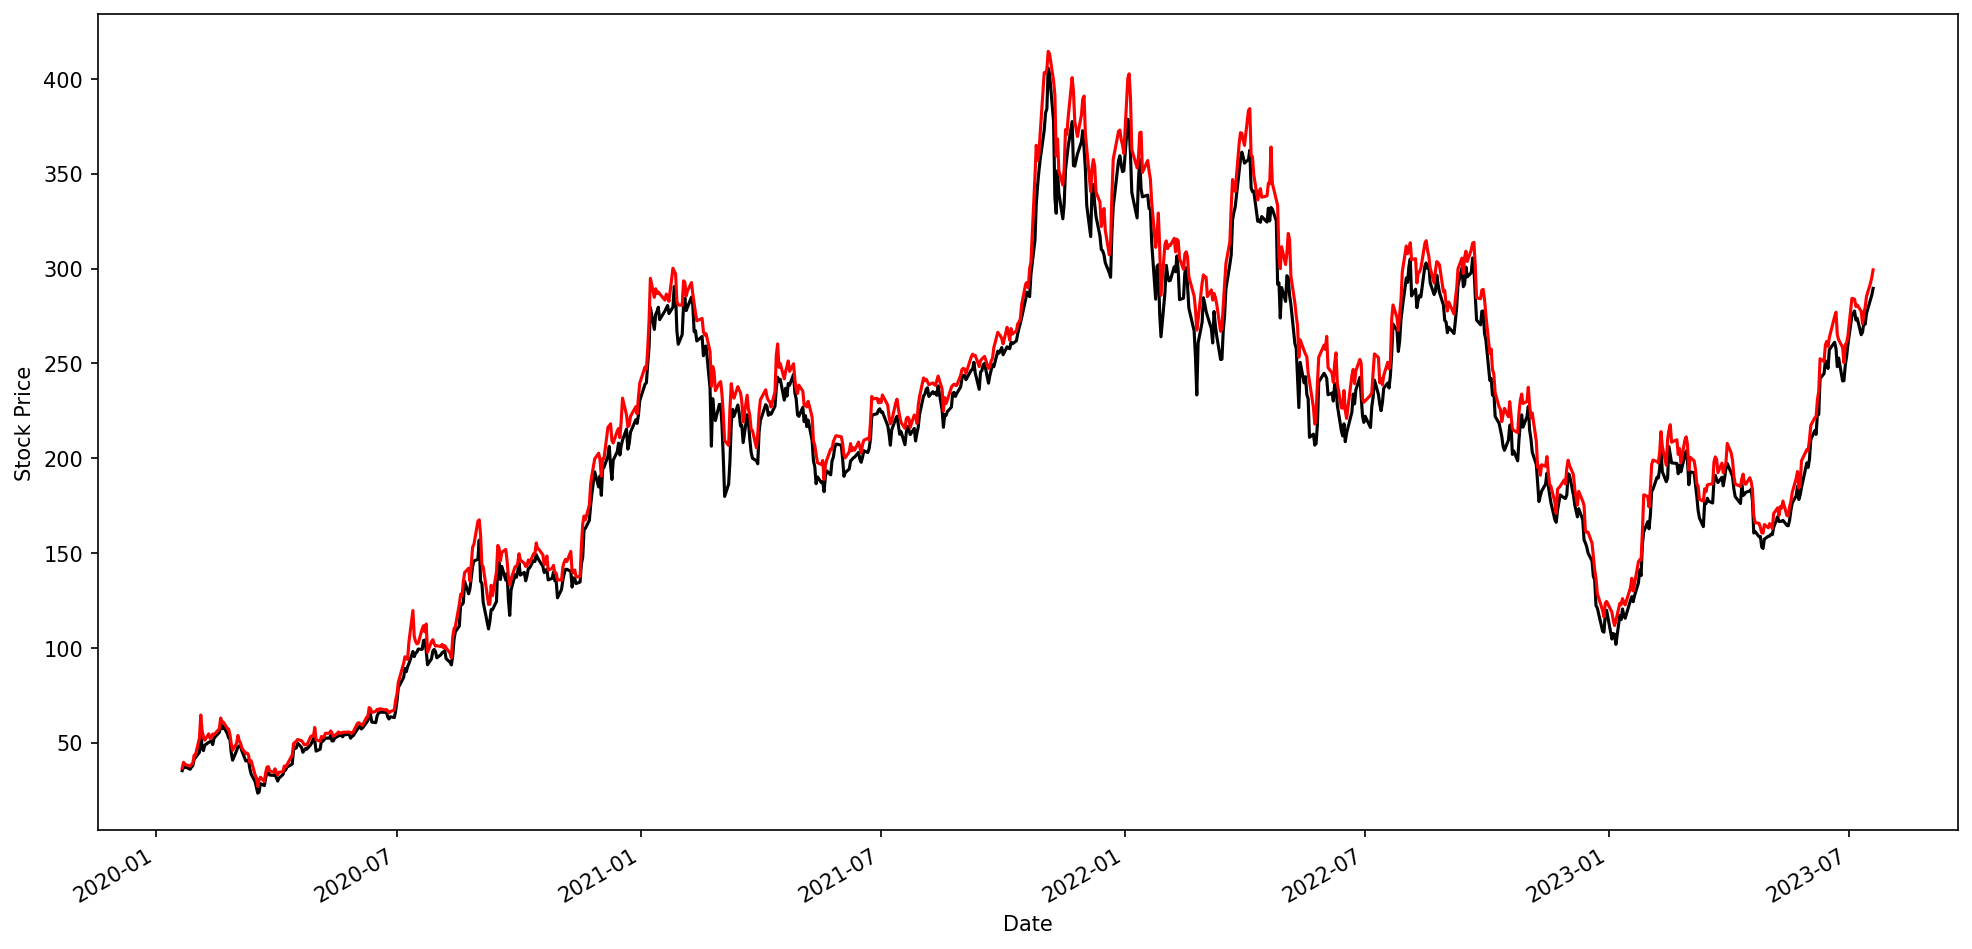

In [141]:
plt.figure(figsize=(16, 8), dpi=150)

# hist['Close'].plot(label='close', color='orange')
# hist['Open'].plot(label='open', color='blue')
hist['Low'].plot(label='low', color='black')
hist['High'].plot(label='high', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [154]:
scaler = StandardScaler()
scaled = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

pred_days = 30
train_split = 0.8

date_index = hist[pred_days:].index

x_train = []
y_train = []

for x in range(pred_days, len(scaled)):
    x_train.append(scaled[x-pred_days:x, 0])
    y_train.append(scaled[x,0])
    
split_idx = int(np.ceil(len(x_train)*train_split))
x_train, y_train = np.array(x_train), np.array(y_train)
x_train, x_test = x_train[:split_idx], x_train[split_idx:]
y_train, y_test = y_train[:split_idx], y_train[split_idx:]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train_date, x_test_date = np.array(date_index[:split_idx]), np.array(date_index[split_idx:])

array([-0.12548741, -0.18239739, -0.14305923, -0.22808403, -0.27059642,
       -0.30437956, -0.44404704, -0.4209202 , -0.27025634, -0.27411076,
       -0.27343058, -0.29712412, -0.13988499, -0.13988499, -0.13807109,
       -0.27875882, -0.30857406, -0.3741    , -0.38090188, -0.31730332,
       -0.44461373, -0.52249656, -0.56954354, -0.55968072, -0.64402535,
       -0.64810654, -0.78493969, -0.78754707, -0.9260809 , -0.95102147,
       -1.11030128, -1.06937601, -0.96609922, -0.95068138, -1.12163792,
       -1.05883293, -1.09624388, -1.0654082 , -0.98933937, -0.99976905,
       -0.95022791, -0.94637349, -0.95952395, -0.85647385, -0.88719622,
       -0.90544822, -0.83459422, -0.71748672, -0.7158996 , -0.70977789,
       -0.53020539, -0.33034056, -0.45776428, -0.38339595, -0.29054885,
       -0.2127795 , -0.19339394, -0.13920482, -0.11596467, -0.06517658,
        0.00318351, -0.11505772, -0.14056516,  0.02506315,  0.08163304,
       -0.0566741 ,  0.01440668, -0.10961618, -0.07005125, -0.05

In [143]:
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dense(units=1))

model.compile(optimizer='Adam', loss='mse')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
22/22 [==============================] - 6s 24ms/step - loss: 0.3098
Epoch 2/30
22/22 [==============================] - 0s 22ms/step - loss: 0.0893
Epoch 3/30
22/22 [==============================] - 1s 23ms/step - loss: 0.0635
Epoch 4/30
22/22 [==============================] - 1s 25ms/step - loss: 0.0551
Epoch 5/30
22/22 [==============================] - 0s 23ms/step - loss: 0.0519
Epoch 6/30
22/22 [==============================] - 1s 24ms/step - loss: 0.0528
Epoch 7/30
22/22 [==============================] - 1s 24ms/step - loss: 0.0463
Epoch 8/30
22/22 [==============================] - 1s 23ms/step - loss: 0.0437
Epoch 9/30
22/22 [==============================] - 1s 23ms/step - loss: 0.0432
Epoch 10/30
22/22 [==============================] - 1s 23ms/step - loss: 0.0421
Epoch 11/30
22/22 [==============================] - 2s 87ms/step - loss: 0.0407
Epoch 12/30
22/22 [==============================] - 1s 23ms/step - loss: 0.0362
Epoch 13/30
22/22 [==================

In [29]:
y_t = y_test.reshape(-1,1)

y_actual = scaler.inverse_transform(y_t)
y_pred = scaler.inverse_transform(model.predict(x_test))
new_data = np.array([x.date() for x in x_test_date])

6/6 [==============================] - 1s 15ms/step


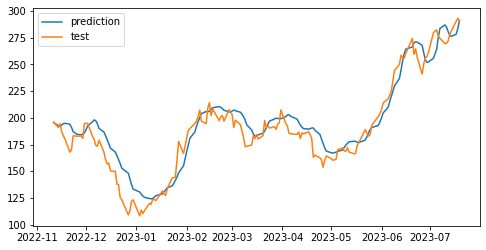

In [185]:
plt.figure(figsize=(8,4))

plt.plot(new_data, y_pred, label = 'prediction')
plt.plot(new_data, y_actual, label = 'test')
plt.legend()
plt.show()

In [190]:
real_data = [y_test[len(y_test) + 1 - pred_days:len(y_test)+1]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 2s 2s/step
Prediction: [[296.421]]


In [9]:
new = tsla.history(period="1d")
jul_20 = new[['Close']]
jul_20

,Close
Date,
2023-07-20 00:00:00-04:00,262.899994


As of July 19 after market hours, Tesla released their earnings report. 

array([-0.12548741, -0.18239739, -0.14305923, -0.22808403, -0.27059642,
       -0.30437956, -0.44404704, -0.4209202 , -0.27025634, -0.27411076,
       -0.27343058, -0.29712412, -0.13988499, -0.13988499, -0.13807109,
       -0.27875882, -0.30857406, -0.3741    , -0.38090188, -0.31730332,
       -0.44461373, -0.52249656, -0.56954354, -0.55968072, -0.64402535,
       -0.64810654, -0.78493969, -0.78754707, -0.9260809 , -0.95102147,
       -1.11030128, -1.06937601, -0.96609922, -0.95068138, -1.12163792,
       -1.05883293, -1.09624388, -1.0654082 , -0.98933937, -0.99976905,
       -0.95022791, -0.94637349, -0.95952395, -0.85647385, -0.88719622,
       -0.90544822, -0.83459422, -0.71748672, -0.7158996 , -0.70977789,
       -0.53020539, -0.33034056, -0.45776428, -0.38339595, -0.29054885,
       -0.2127795 , -0.19339394, -0.13920482, -0.11596467, -0.06517658,
        0.00318351, -0.11505772, -0.14056516,  0.02506315,  0.08163304,
       -0.0566741 ,  0.01440668, -0.10961618, -0.07005125, -0.05

In [33]:
rmse = mean_squared_error(y_actual, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_actual, y_pred)
print("RSME: ", rmse)
print ("MAPE: ", mape)

RSME:  12.850259732307093
MAPE:  0.058911917973198495
